# Exercises - Overview

- Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

#### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?

    - Null: There is no difference or change in average network latency post-switch
    - Alt: There has been an increase in average network latency post_switchy
    - True Positive (correctly rejecting null hypothesis): Testing shows 5% increase in network latency
    - True Negative: Testing shows 0% change in network latency
    - Type 1 Error: Suggesting there is no difference before testing shows a differnce
    - Type 2 Error: Suggesting there is a difference before testing fails to show a difference
    

- Is the website redesign any good?

    - Rewrite: Have customer feeback survey's shown an increase in positive remarks about the website design?
    - Null: % of positive design remarks has not changed. 
    - Alt: There has been a change % of positive remarks about website design. 
    - True Positive: Identifying a change in positive remarks
    - True Negative: Identifying no change in positive remarks
    - Type 1: Model suggests there was change in feedback. Testing shows there was no change.
    - Type 2: Model suggests there will be no change  in feedback. Testing shows change. 

- Is our television ad driving more sales?

    - Rewrite: A greater than previous percentage of customers report having been exposed to ad campaign
    - Null: There will no change in % of customers that report ad impression
    - Alt: There will be a change 
    - True Positive: Both model and testing show a change in customer ad impressions
    - True Negative: Both model and testing show no change in customer ad impressions
    - Type 1: Model suggests change, testing shows no change.
    - Type 2: Model suggest no change, testing shows change. 

# Exercises - T-Test
Continue working in your hypothesis_testing notebook.

In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

## 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
    * A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
    * A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

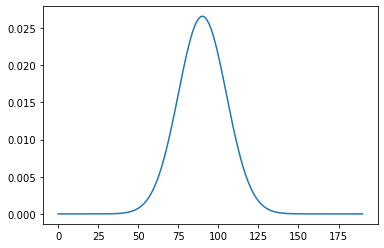

In [3]:
office_one_dist = stats.norm(90, 15)
x1 = np.arange(0,191,1)
y1 = office_one_dist.pdf(x1)
plt.plot(x1,y1)
office_one_exp = office_one_dist.rvs(40)

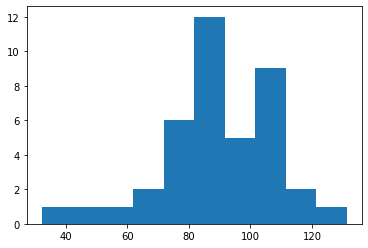

In [4]:
plt.hist(office_one_exp)
plt.show()

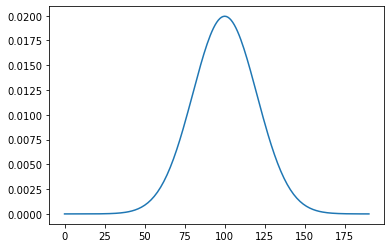

In [5]:
office_two_dist = stats.norm(100, 20)
x2 = np.arange(0,191,1)
y2 = office_two_dist.pdf(x2)
plt.plot(x2,y2)
office_two_exp = office_two_dist.rvs(50)

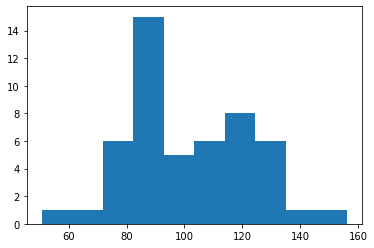

In [6]:
plt.hist(office_two_exp)
plt.show()

In [7]:
office_one_exp.var(), office_two_exp.var()

(339.9202867443464, 436.15659709983163)

In [8]:
office_t, office_p = stats.ttest_ind(office_one_exp, office_two_exp, equal_var=False) 

In [9]:
office_t, office_p

(-2.87136907793855, 0.005131160309583252)

In [10]:
office_p < .05

True

Load the mpg dataset and use it to answer the following questions:


In [11]:
from pydataset import data

In [12]:
mpg = pd.DataFrame(data('mpg'))

In [13]:
mpg['efficiency'] = (mpg.cty + mpg.hwy) / 2

## Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

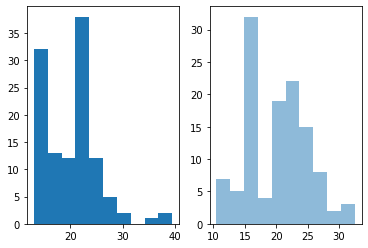

In [14]:
old_cars = mpg[mpg.year == 1999]

new_cars = mpg[mpg.year == 2008]

n_row = 1
n_col = 2
plt.figure()
plt.subplot(n_row, n_col, 1)
plt.hist(old_cars['efficiency'])

plt.subplot(n_row, n_col, 2)
plt.hist(new_cars['efficiency'], alpha=.5)
plt.show()

* H0: there is no difference in fuel-efficiency
* Ha: there is significant difference 
* significance level
    * $ {\alpha} $ = .05

In [15]:
#verify assumptions
 #check, check, and check, 

In [16]:
old_cars.efficiency.var(), new_cars.efficiency.var()

(27.122605363984682, 24.097480106100797)

In [17]:
t, p = stats.ttest_ind(old_cars.efficiency, new_cars.efficiency, equal_var=False)

In [18]:
t, p

(0.21960177245940962, 0.8263750772060638)

In [19]:
p < .05 # --> failure to reject null hypothesis

False

In [20]:
stats.ttest_ind_from_stats(90, 15, 40, 100,20,50, equal_var=False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

### Are compact cars more fuel-efficient than the average car?

In [21]:
#hypothesis 
# H0: no difference 
# Ha: significantly larger
# alpha = .05

In [22]:
compacts = mpg[mpg['class'] == 'compact']

In [23]:
t, p = stats.ttest_1samp(compacts.efficiency, mpg.efficiency.mean())

In [24]:
p/2 < .05

True

In [25]:
t > 0

True

In [26]:
#both true reject null hypothesis

### Do manual cars get better gas mileage than automatic cars?
H0: manual <= automatic
Ha: manual > automatic 
alpha: .05


In [27]:
manuals = mpg[mpg['trans'].str.contains('auto') == False]
automatics = mpg[mpg['trans'].str.contains('auto')]

In [28]:
t, p = stats.ttest_ind(manuals.efficiency, automatics.efficiency, equal_var=False)

In [29]:
p/2 < .05

True

In [30]:
t > 0 #--> reject null

True

# Exercises: Correlation

#### Continue working in your hypothesis_testing notebook.

#### Use the telco_churn data. 

In [31]:
telco_churn = pd.read_csv('Cust_Churn_Telco.csv')

### Does tenure correlate with monthly charges? 

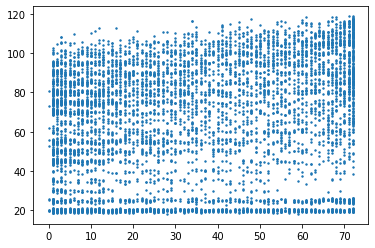

In [34]:
plt.scatter(telco_churn.tenure, telco_churn.MonthlyCharges, s=2)
plt.show()

In [32]:
#hypothesis 
# H0: no linear correlation between tenure and monthly charges
# Ha: there is lindear correlation between tenure and monthly charges
# alpha = .05

In [114]:
corr, p = stats.pearsonr(telco_churn.tenure, telco_churn.MonthlyCharges)
print(corr, p)

0.2478998562861525 4.094044991483017e-99


In [115]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Total charges? 

* H0: no linear correlation between tenure and total charges
* Ha: there is lindear correlation between tenure and monthly charges
* significance level
    * $ {\alpha} $ = .05

In [35]:
telco_churn.TotalCharges = pd.to_numeric(telco_churn.TotalCharges, errors='coerce')

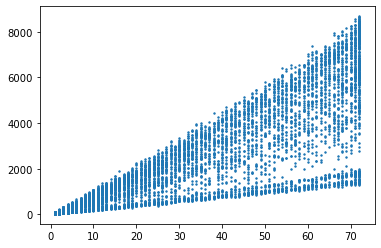

In [116]:
plt.scatter(telco_churn.tenure, telco_churn.TotalCharges, s=2)
plt.show()

In [118]:
corr, p = stats.pearsonr(telco_churn.tenure, telco_churn.TotalCharges.interpolate(method='linear'))
print(corr, p)

0.8242388930255051 0.0


In [119]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### What happens if you control for phone and internet service?

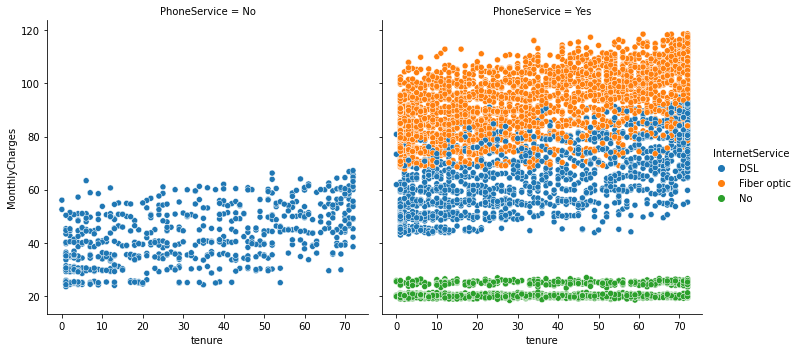

In [120]:
#plot them
sns.relplot(data=telco_churn, x='tenure', y='MonthlyCharges', col='PhoneService', hue='InternetService')
plt.show()

In [123]:
telco_churn.groupby(['InternetService', 'PhoneService']).count()

customerID  gender  SeniorCitizen  Partner  \
InternetService PhoneService                                               
DSL             No                   682     682            682      682   
                Yes                 1739    1739           1739     1739   
Fiber optic     Yes                 3096    3096           3096     3096   
No              Yes                 1526    1526           1526     1526   

                              Dependents  tenure  MultipleLines  \
InternetService PhoneService                                      
DSL             No                   682     682            682   
                Yes                 1739    1739           1739   
Fiber optic     Yes                 3096    3096           3096   
No              Yes                 1526    1526           1526   

                              OnlineSecurity  OnlineBackup  DeviceProtection  \
InternetService PhoneService                                                   
DSL             No                       682           682               682   
                Yes                     1739          1739              1739   
Fiber optic     Yes                     3096          3096              3096   
No              Yes                     1526          1526              1526   

                              TechSupport  StreamingTV  StreamingMovies  \
InternetService PhoneService                                              
DSL             No                    682          682              682   
                Yes                  1739         1739             1739   
Fiber optic     Yes                  3096         3096             3096   
No              Yes                  1526         1526             1526   

                              Contract  PaperlessBilling  PaymentMethod  \
InternetService PhoneService                                              
DSL             No                 682               682            682   
                Yes               1739              1739           1739   
Fiber optic     Yes               3096              3096           3096   
No              Yes               1526              1526           1526   

                              MonthlyCharges  TotalCharges  Churn  
InternetService PhoneService                                       
DSL             No                       682           680    682  
                Yes                     1739          1736   1739  
Fiber optic     Yes                     3096          3096   3096  
No              Yes                     1526          1520   1526

In [139]:
#defin correlation function for the apply
def corr_fun(df):
    return pd.Series(stats.pearsonr(df.tenure.interpolate(method='linear'), df.TotalCharges.interpolate(method='linear')), index=['r','p'])

In [140]:
#use correlation function
telco_churn.groupby(['InternetService','PhoneService']).apply(corr_fun)

r    p
InternetService PhoneService               
DSL             No            0.951263  0.0
                Yes           0.969871  0.0
Fiber optic     Yes           0.985309  0.0
No              Yes           0.978086  0.0

* Reject null hypothesis for all controlled cases. 

In [39]:
#misunderstood question
with_phone = telco_churn[telco_churn.PhoneService == 'Yes']
corr, p = stats.pearsonr(with_phone.tenure, with_phone.TotalCharges.interpolate(method='pad'))
print(corr, p)

without_phone = telco_churn[telco_churn.PhoneService == 'No']
corr, p = stats.pearsonr(without_phone.tenure, without_phone.TotalCharges.interpolate(method='pad'))
print(corr, p)

with_internet = telco_churn[telco_churn.InternetService != 'No']
without_internet = telco_churn[telco_churn.InternetService == 'No']

corr, p = stats.pearsonr(with_internet.tenure, with_internet.TotalCharges.interpolate(method='pad'))
print(corr, p)

corr, p = stats.pearsonr(without_internet.tenure, without_internet.TotalCharges.interpolate(method='pad'))
print(corr, p)

## Use the employees database.

In [44]:
from env import host, user, password
import datetime

emp_url = f'mysql+pymysql://{user}:{password}@{host}/employees'

emp_sql = """
SELECT*
FROM employees
JOIN salaries USING (emp_no)
WHERE salaries.to_date > now()
"""

emp_df = pd.read_sql(emp_sql, emp_url)

### Is there a relationship between how long an employee has been with the company and their salary?

In [32]:
#hypothesis 
# H0: no linear correlation between tenure and salary
# Ha: there is lindear correlation between tenure and salary
# alpha = .05

In [45]:
emp_df['hire_date'] = pd.to_datetime(emp_df['hire_date'])

emp_df['tenure'] = datetime.datetime.now() - emp_df['hire_date']

emp_df['tenure'] = emp_df.tenure.dt.days

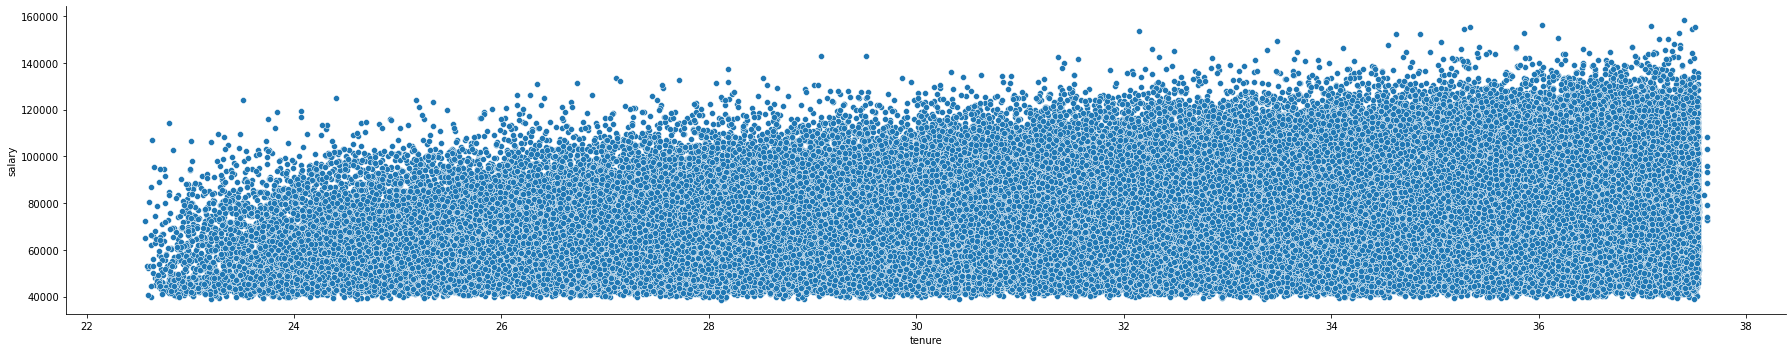

In [46]:
sns.relplot(data=emp_df, x=emp_df.tenure/365 , y=emp_df.salary, aspect=5)
plt.show()

In [141]:
corr, p = stats.pearsonr(emp_df.tenure, emp_df.salary)
print(corr, p)

0.3064625613186014 0.0


In [142]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [32]:
#hypothesis 
# H0: no linear correlation between tenure and number of titles
# Ha: there is lindear correlation between tenure and number titles
# alpha = .05

In [48]:
titles_url = f'mysql+pymysql://{user}:{password}@{host}/employees'

titles_sql = """
SELECT emp_no, count(emp_no) as 'titles', employees.hire_date
FROM employees
JOIN titles USING (emp_no)
JOIN salaries USING (emp_no)
WHERE salaries.to_date > now()
GROUP BY employees.emp_no
;
"""

titles = pd.read_sql(titles_sql, titles_url)
titles_df = pd.DataFrame(titles)

In [49]:
emp_df = emp_df.merge(titles, on='emp_no')

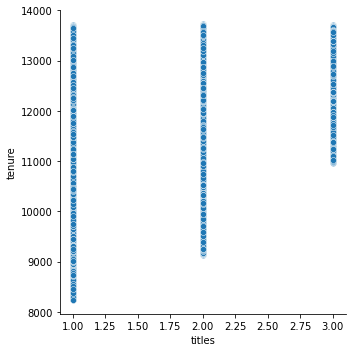

In [50]:
sns.relplot(data=emp_df, x=emp_df.titles, y=emp_df.tenure)
plt.show()

In [143]:
corr, p = stats.pearsonr(emp_df.tenure, emp_df.titles)
print(corr, p)

0.2871267889704734 0.0


In [144]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Use the sleepstudy data.
### Is there a relationship between days and reaction time?

In [52]:
from pydataset import data

sleep_study = data('sleepstudy')

In [32]:
#hypothesis 
# H0: no linear correlation between days and reaction time
# Ha: there is lindear correlation between days and reaction time
# alpha = .05

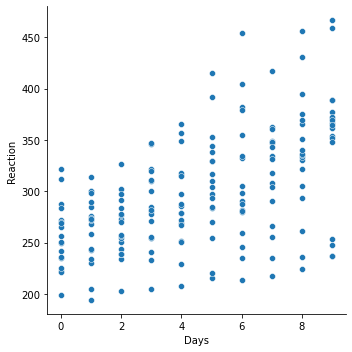

In [53]:
sns.relplot(data=sleep_study, x=sleep_study.Days, y=sleep_study.Reaction)
plt.show()

In [145]:
corr, p = stats.pearsonr(sleep_study.Days, sleep_study.Reaction)
print(corr, p)

0.5352302262650255 9.89409632221439e-15


In [146]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# Exercises: Chi Square
Continue working in your `hypothesis_testing` notebook

## 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.
| | Codeup Student | Not Codeup Student | Total |
|---| :--- | :---: | --- |
uses a Mackook| 49| 20| 69|
doesnt use a macbook |1 |30| 31|
total | 50|50|100|


H0: Macbook use is independent of being a Codeup Student

Ha: Macbook use is not independent of being a Codeup Student

Significance Level: .05

In [55]:
#find and calculate proportions
student = 50/100 #-- > codeup student proportion
non_student = 50/100 # -->not codeup student
mac = 69/100 # --> uses a macbook
non_mac = 31/100 # --> does not use a macbook

In [56]:
#Multiply together for contingency table of expected values
print(f"{'':<15} |{'Student':<10}| {'Not Student':<10}")
print(f"{'Uses Macbook':<15} |{student*mac:<10}| {non_student * mac:<10}")
print(f"{'No Macbook':<15} |{student*non_mac:<10}| {non_student * non_mac:<10}")
#calculate test statistic and compute p-value

                |Student   | Not Student
Uses Macbook    |0.345     | 0.345     
No Macbook      |0.155     | 0.155     


In [58]:
index = ['Uses Macbook', 'Does Not Use Macbook']
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()
expected = pd.DataFrame([[student*mac, non_student * mac], [student*non_mac, non_student * non_mac]], index=index, columns=columns) * n

chi2 = ((observed - expected)**2 / expected).values.sum()
nrows, ncols = observed.shape
degrees_of_freedom = (nrows - 1) * (ncols - 1)
p = stats.chi2(degrees_of_freedom).sf(chi2)
alpha =.05

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('\n')

if p < alpha :
    print('Reject null hypothesis')
else: 
    print('Fail to reject null hypothesis')

Observed
                      Codeup Student  Not Codeup Student
Uses Macbook                      49                  20
Does Not Use Macbook               1                  30
---
Expected
                      Codeup Student  Not Codeup Student
Uses Macbook                    34.5                34.5
Does Not Use Macbook            15.5                15.5
---

chi^2 = 39.3174
p     = 0.0000


Reject null hypothesis


## 2. Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them. 
Be sure to state your null and alternative hyptheses. 

In [61]:
from pydataset import data
mpg = data('mpg')

In [63]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### * Is class independent from cylinder size?
H0: Class is independent from cylinder size

Ha: There is an association between class and cylinder size

In [64]:
#set alpha
alpha - .05

0.0

In [67]:
 observed = pd.crosstab(mpg.cyl, mpg['class'], margins=True)

In [68]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [71]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha :
    print('Reject null hypothesis')
else: 
    print('Fail to reject null hypothesis')

Observed
[[  0  32  16   1   3  21   8  81]
 [  0   2   0   0   0   2   0   4]
 [  0  13  23  10  10   7  16  79]
 [  5   0   2   0  20   5  38  70]
 [  5  47  41  11  33  35  62 234]]

Expected
[[  1  16  14   3  11  12  21  81]
 [  0   0   0   0   0   0   1   4]
 [  1  15  13   3  11  11  20  79]
 [  1  14  12   3   9  10  18  70]
 [  5  47  41  11  33  35  62 234]]

----
chi^2 = 138.0282
p     = 0.0000
Reject null hypothesis


## 3. Use the data from the employees database to answer these questions:
### * Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

H0: Employee's gender is independent of whether an employee works in sales or marketing

Ha: There appears to be a relationship between gender and employement in sales or marketing

In [99]:
gender_url = f'mysql+pymysql://{user}:{password}@{host}/employees'

gender_sql = """
SELECT  e.gender, d.dept_name
FROM employees e
JOIN salaries s USING (emp_no)
JOIN dept_emp de USING (emp_no)
JOIN departments d USING (dept_no)
WHERE s.to_date > NOW() AND de.to_date > NOW() AND d.dept_name IN ('Sales', 'Marketing')
;
"""

gender = pd.read_sql(gender_sql, gender_url)

In [103]:
observed = pd.crosstab(gender.gender, gender.dept_name)

In [104]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

alpha = .05
if p < alpha :
    print('Reject null hypothesis')
else: 
    print('Fail to reject null hypothesis')

Observed
[[ 5864 14999]
 [ 8978 22702]]

Expected
[[ 5893 14969]
 [ 8948 22731]]

----
chi^2 = 0.3240
p     = 0.5692
Fail to reject null hypothesis


### * Is an employee's gender independent of whether or not they are or have been a manager?

H0: Employee gender is independent of whether or not they are or have been a manager

Ha: Employee gender is associated with whether or not they are or have been a manager

In [108]:
manager_url = f'mysql+pymysql://{user}:{password}@{host}/employees'

manager_sql = """
SELECT e.gender, e.emp_no,
		CASE 
			WHEN e.emp_no IN (SELECT dm.emp_no FROM dept_manager dm) THEN 'Has Managed' 
			ELSE 'Not Managed'
		END AS 'Managed'
FROM employees e
;
"""

managers = pd.read_sql(manager_sql, manager_url)

In [147]:
observed = pd.crosstab(managers.gender, managers.Managed)

In [148]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

alpha = 0.05

if p < alpha :
    print('Reject null hypothesis')
else: 
    print('Fail to reject null hypothesis') 

Observed
[[    13 120038]
 [    11 179962]]

Expected
[[     9 120041]
 [    14 179958]]

----
chi^2 = 1.4567
p     = 0.2275
Fail to reject null hypothesis
